This is the master notebook for this project. We will only put final parts of our code into this.

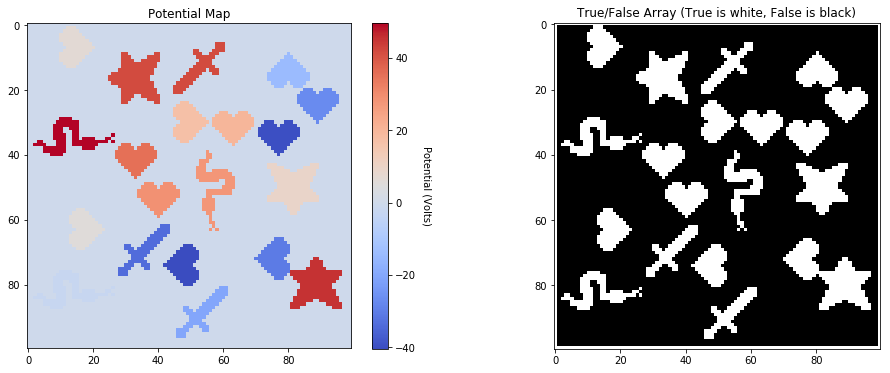

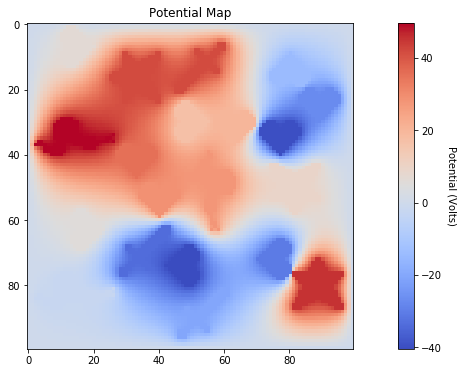

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve_banded
from scipy.fftpack import dst, idst
from matplotlib.animation import FuncAnimation
import random as rand
def cArys(x,y):
    V=np.zeros((x,y))
    TF=np.ones((x,y),dtype=bool)
    Fy=np.zeros((1,y),dtype=bool)
    Fx=np.zeros((1,x),dtype=bool)
    TF[0]=TF[x-1]=Fy
    TF.T[0]=TF.T[y-1]=Fx
    return V,TF



def smArys(ind,rot,pot):
    if ind==0:
        A=[[0,0,pot,pot,pot,0,0,0,pot,pot,pot,0,0],
           [0,pot,pot,pot,pot,pot,0,pot,pot,pot,pot,pot,0],
           [pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot],
           [pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot],
           [pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot],
           [0,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,0],
           [0,0,pot,pot,pot,pot,pot,pot,pot,pot,pot,0,0],
           [0,0,0,pot,pot,pot,pot,pot,pot,pot,0,0,0],
           [0,0,0,0,pot,pot,pot,pot,pot,0,0,0,0],
           [0,0,0,0,0,pot,pot,pot,0,0,0,0,0],
           [0,0,0,0,0,0,pot,0,0,0,0,0,0]]
        return rota(np.array(A),rot)
    if ind==1:
        A=[[0,0,0,0,0,0,0,0,0,0,0,0,0,pot,pot,pot],
          [0,0,0,0,0,0,0,0,0,0,0,0,pot,pot,pot,pot],
          [0,0,0,0,0,0,0,0,0,0,0,pot,pot,pot,pot,pot],
          [0,0,0,0,0,0,0,0,0,0,pot,pot,pot,pot,pot,0],
          [0,0,0,0,0,0,0,0,0,pot,pot,pot,pot,pot,0,0],
          [0,0,0,0,0,0,0,0,pot,pot,pot,pot,pot,0,0,0],
          [0,0,pot,pot,0,0,0,pot,pot,pot,pot,pot,0,0,0,0],
          [0,0,pot,pot,pot,0,pot,pot,pot,pot,pot,0,0,0,0,0],
          [0,0,0,pot,pot,pot,pot,pot,pot,pot,0,0,0,0,0,0],
          [0,0,0,0,pot,pot,pot,pot,pot,0,0,0,0,0,0,0],
          [0,0,0,0,pot,pot,pot,pot,0,0,0,0,0,0,0,0],
          [0,0,0,pot,pot,pot,pot,pot,pot,0,0,0,0,0,0,0],
          [0,0,pot,pot,pot,0,0,pot,pot,pot,0,0,0,0,0,0],
          [pot,pot,pot,pot,0,0,0,0,pot,pot,0,0,0,0,0,0],
          [pot,pot,pot,0,0,0,0,0,0,0,0,0,0,0,0,0],
          [pot,pot,pot,0,0,0,0,0,0,0,0,0,0,0,0,0]]
        return rota(np.array(A),rot)
    if ind==2:
        A=[[0,0,0,0,0,0,0,pot,pot,0,0,0,0,0,0,0],
          [0,0,0,0,0,0,pot,pot,pot,pot,0,0,0,0,0,0],
          [0,0,0,0,0,0,pot,pot,pot,pot,0,0,0,0,0,0],
          [0,0,0,0,0,pot,pot,pot,pot,pot,pot,0,0,0,0,0],
          [pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot],
          [pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot],
          [0,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,0],
          [0,0,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,0,0],
          [0,0,0,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,0,0,0],
          [0,0,0,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,0,0,0],
          [0,0,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,0,0],
          [0,0,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,0,0],
          [0,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,0],
          [0,pot,pot,pot,pot,pot,pot,0,0,pot,pot,pot,pot,pot,pot,0],
          [pot,pot,pot,pot,pot,0,0,0,0,0,0,pot,pot,pot,pot,pot],
          [pot,pot,pot,0,0,0,0,0,0,0,0,0,0,pot,pot,pot]]
        return rota(np.array(A),rot)
    if ind==3:
        A=[[0,0,0,0,0,pot,0,pot,0,0,0,0],
        [0,0,0,0,0,0,pot,0,0,0,0,0],
        [0,0,0,0,0,0,pot,pot,0,0,0,0],
        [0,0,0,0,0,0,0,pot,0,0,0,0],
        [0,0,0,0,0,0,0,pot,0,0,0,0],
        [0,0,0,0,0,0,0,pot,pot,0,0,0],
        [0,0,0,0,0,0,pot,pot,pot,pot,0,0],
        [0,0,0,0,0,0,pot,pot,pot,pot,0,0],
        [0,0,0,0,0,0,pot,pot,pot,pot,0,0],
        [0,0,0,0,0,0,pot,pot,pot,pot,0,0],
        [0,0,0,0,0,0,0,pot,pot,0,0,0],
        [0,pot,pot,pot,pot,pot,pot,pot,pot,0,0,0],
        [0,pot,pot,pot,pot,pot,pot,pot,pot,0,0,0],
        [pot,pot,pot,pot,0,0,0,0,0,0,0,0],
        [pot,pot,pot,0,0,0,0,0,0,0,0,0],
        [pot,pot,pot,0,0,pot,pot,pot,pot,pot,pot,0],
        [pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot],
        [0,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot],
        [0,0,pot,pot,pot,pot,pot,0,0,pot,pot,pot],
        [0,0,0,0,0,0,0,0,0,pot,pot,pot],
        [0,0,0,0,0,0,0,0,0,pot,pot,0],
        [0,0,0,0,0,0,0,0,pot,pot,pot,0],
        [0,0,0,0,0,0,0,pot,pot,0,0 ,0],
        [0,0,0,0,0,0,0,pot,pot,0,0 ,0],
        [0,0,0,0,0,0,0,0,pot,0,0 ,0]]
        return rota(np.array(A),rot)
    return False
    

def rota(A,rot):
    for n in range(0,rot):
        A=np.rot90(A)
    return A

def insrt(xi,yi,A,V,TF):
    lx,ly=np.shape(A)
    if np.all(TF[xi:xi+lx,yi:yi+ly]==True):
        V[xi:xi+lx,yi:yi+ly]=A
        TF[xi:xi+lx,yi:yi+ly]=(A==0)
        return False
    else:
        return True
        
def genInit(x,y,nSmall,minPot, maxPot):
    V,TF=cArys(x,y)
    for n in range(nSmall):
        check=True
        while check:
            ind=rand.randint(0,3)
            rot=rand.randint(0,3)
            pot=rand.uniform(minPot,maxPot)
            A=smArys(ind,rot,pot)
            xi=rand.randint(0,x-1)
            yi=rand.randint(0,y-1)
            check=insrt(xi,yi,A,V,TF)
    TF=np.logical_not(TF)
    return V,TF

##########################################################################################################

V,TF=genInit(100,100,20,-50,50)
plt.figure(figsize=(16,6))
plt.subplot(121)
plt.title("Potential Map")
plt.imshow(V,cmap="coolwarm")
cbar=plt.colorbar()
cbar.set_label("Potential (Volts)", rotation=270,labelpad=15)
plt.subplot(122)
plt.title("True/False Array (True is white, False is black)")
plt.imshow(TF,cmap="gray");
##########################################################################################################

V_plot=V.copy()
dif= 1
tol= 10**-3

i=0
while dif >= tol:
    i+=1
    V_plot_last = V_plot.copy()
    left = np.roll(V_plot, 1, axis=1)
    right = np.roll(V_plot, -1, axis=1)
    above = np.roll(V_plot, -1, axis=0)
    below = np.roll(V_plot, 1, axis=0)
    V_plot[1:-1, 1:-1] = 0.25*(left[1:-1, 1:-1] + right[1:-1, 1:-1] +above[1:-1, 1:-1] + below[1:-1, 1:-1])
    
    np.add(V_plot, -V_plot, out=V_plot, where =TF)
    np.add(V_plot, V, out=V_plot, where =TF)
    dif = np.max(abs(V_plot_last-V_plot))
plt.figure(figsize=(16,6))
plt.title("Potential Map")
plt.imshow(V_plot,cmap="coolwarm")
cbar=plt.colorbar()
cbar.set_label("Potential (Volts)", rotation=270,labelpad=15)
